In [50]:
import numpy as np 
import pandas as pd 
from scipy.stats import norm 
from scipy.optimize import root 
import matplotlib.pyplot as plt

In [51]:
def DiscountFactor(S, T, f): 
    D = np.exp(- (T - S) * f) 
    return D
T = 1 
delta = 0.25 
f = 0.0125
D = DiscountFactor(0, T + delta, f)
D

0.9844964370054085

## Q1 (a)
Discount factor is 0.9844964370054085

In [52]:
F_0 = (1 / delta) * ( np.exp(delta * f) - 1) 
print(F_0)
def BS_F_Put(F_0, K, T, sigma, delta, D): 
    d_1 = (np.log(F_0 / K) + 0.5 * (sigma ** 2) * T) / (sigma * np.sqrt(T)) 
    d_2 = d_1 - sigma * np.sqrt(T) 
    return delta * D * (norm.cdf(- d_2) * K - norm.cdf(- d_1) * F_0) 
sigma = 0.15 
K = 0.0125
P_BS = BS_F_Put(F_0, K, T, sigma, delta, D) 
P_BS

0.012519551610956192


0.00018168026859652882

## Q1 (b)
F0 is 0.012519551610956192 <p>
The price of Caplet under Black Scholes Model is 0.0006248928835618972

In [53]:
sigman = sigma * F_0 
sigman

0.0018779327416434287

## Q1 (c)
$\sigma_{n}$ should be 0.0018779327416434287

In [54]:
def BachelierPut(F_0, K, T, sigma, delta, D): 
    d1 = -(F_0 - K) / (sigma * np.sqrt(T)) 
    P = delta * D * sigma * np.sqrt(T) * (d1 * norm.cdf(d1) + norm.pdf(d1)) 
    return P
P_norm = BachelierPut(F_0, K, T, sigman, delta, D) 
print("The price under the Bachelier model is {:.10f}.".format(P_norm))
difference = P_BS - P_norm
print("The difference betweem prices under diferent models is {:.10f}.".format(difference))

The price under the Bachelier model is 0.0001819969.
The difference betweem prices under diferent models is -0.0000003166.


## Q1 (d)
The price under the Bachelier model is 0.0001097029.<p>
The two prices are almost the same, it's because the variance increments are almost the same in two models.

The difference between the two prices is 0.0000001553, the price under the normal model is higher. It's because that the Bachelier model allows negative F while Black-Scholes model only allows positive F.

In [55]:
def Greeks_BS(F_0, K, sigma, T, delta, D):
    d1 = ( np.log( F_0 / K) + 0.5 * (sigma ** 2) * T ) / (sigma * np.sqrt(T))
    Delta = delta * D * ( norm.cdf(d1) - 1 )
    Gamma = delta * D * ( norm.pdf(d1) / (F_0 * sigma * np.sqrt(T)) )
    Vega  = delta * D * ( F_0 * np.sqrt(T) * norm.pdf(d1) )
    Theta = -delta * D * ( (F_0 * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) )
    Price = BS_F_Put(F_0, K, T, sigma, delta, D)
    return Price, Delta, Gamma, Vega, Theta

Strikes = [0.005, 0.0075, 0.01, 0.0125]
# Prices, Delta, Gamma, Vega, Theta = [Greeks_BS(F_0, k, sigma, T, delta, D) for k in Strikes]
# data_Greeks_df = pd.DataFrame(Prices, Delta, Gamma, Vega, Theta)
df = pd.DataFrame(Greeks_BS(F_0, k, sigma, T, delta, D) for k in Strikes)
df.columns = ['Prices', 'Delta', 'Gamma', 'Vega', 'Theta']
df

,Prices,Delta,Gamma,Vega,Theta
0,2.134868e-14,-7.217245e-11,2.439647e-07,5.735823e-12,-4.301867e-13
1,2.906480e-08,-5.923641e-05,1.180617e-01,2.775734e-06,-2.081801e-07
2,1.213562e-05,-1.423937e-02,1.517264e+01,3.567220e-04,-2.675415e-05
3,1.816803e-04,-1.146850e-01,5.209545e+01,1.224810e-03,-9.186072e-05


## Q1 (e)
K = 0.0125 options have the highest gamma vega and gamma. K = 0.005 options have the highest theta.

Gamma measures hedging risk. When the underlying price is close to the strike price, the uncertainty of whether the option will be exercised is the greatest, and the hedging risk is also the highest at this time, and Gamma reaches its maximum value. 

The Vega value is highest when the underlying price is close to the strike price of the option. As the option is about to expire, the Vega value declines. The longer the expiration time, the higher the Vega value of the option. 

So, Gamma and Vega are both the highest when K = 0.0125 == F0

The Theta is the amount by which an option's value declines every day, it's usually negative. For put options, as K approaches F0 from lower points, the option value increases. Thus, the highest value of put option is at K = 0.0125, and as we know Theta is the value lost through time, Theta is the highest at K = 0.005.

In [56]:
def Caps(Ti, Length, Black_vol): 
    f = 0.01 
    delta = 0.25 
    C = 0
    F_0 = (1 / delta) * ( np.exp( delta * f) - 1 )
    for i in range(Length * 4):
        E = F_0 * (norm.cdf(0.5 * Black_vol * np.sqrt(Ti + delta * i)) - norm.cdf(-0.5 * Black_vol * np.sqrt(Ti + delta * i))) 
        C += delta * DiscountFactor(0, Ti + delta * (i + 1), f) * E
    return C

T_is   = [1, 2, 3, 4, 5] 
length = [2, 2, 2, 2, 2] 
Black_Vols = [0.15, 0.2, 0.225, 0.225, 0.25]

price = [Caps(T_is[i], length[i], Black_Vols[i]) for i in range(len(T_is))]
price

[0.001582233776715602,
 0.002598304044800676,
 0.0033568536986579196,
 0.0037241292438357494,
 0.004477772462164528]

In [57]:
sigma_1 = 0.15
delta = 0.25
f = 0.01
F_0 = (1 / delta) * ( np.exp( delta * f) - 1 )

def E(F_0, Black_vol, Ti):
    return F_0 * (norm.cdf(0.5 * Black_vol * np.sqrt(Ti)) - norm.cdf(-0.5 * Black_vol * np.sqrt(Ti))) 

def root_sigma(sigma_new, price, start, sigma_old): 
    price_old = 0 
    price_new = 0 
    for i in range(4): 
        price_old += delta * DiscountFactor(0, start - 1 + (i + 1) * delta, f) * E(F_0, sigma_old, start - 1 + i * delta) 
        price_new += delta * DiscountFactor(0, start + (i + 1) * delta, f) * E(F_0, sigma_new, start + i * delta) 
    return price_old + price_new - price

Implied_Vol = [sigma_1] 
sigma = sigma_1 

for i in range(3, 7): 
    sol_sigma = root(root_sigma, sigma, args = (price[i - 2], i, sigma)) 
    sigma = sol_sigma.x[0] 
    Implied_Vol.append(sigma)
print(Implied_Vol)

[0.15, 0.2428191628142852, 0.20915576717102952, 0.23958757124653962, 0.25976769665246763]


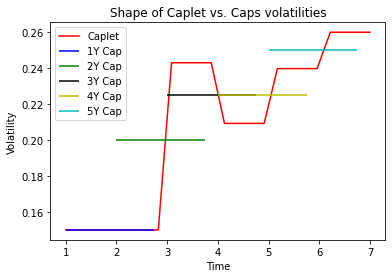

In [58]:
Time = np.linspace(1, 7, 24) 
plt.title("Shape of Caplet vs. Caps volatilities")
plt.xlabel("Time") 
plt.ylabel("Volatility") 
plt.plot(Time, np.repeat(np.array(Implied_Vol), [8, 4, 4, 4, 4]), label = "Caplet", c = 'r')
plt.hlines(Black_Vols[0], xmin = 1, xmax = 2.75, color = 'b', label = "1Y Cap") 
plt.hlines(Black_Vols[1], xmin = 2, xmax = 3.75, color = 'g', label = "2Y Cap") 
plt.hlines(Black_Vols[2], xmin = 3, xmax = 4.75, color = 'k', label = "3Y Cap") 
plt.hlines(Black_Vols[3], xmin = 4, xmax = 5.75, color = 'y', label = "4Y Cap") 
plt.hlines(Black_Vols[4], xmin = 5, xmax = 6.75, color = 'c', label = "5Y Cap") 
plt.legend()

## Q2 (b)
Caps implied volatility is like the weighted average of caplet implied volatilities, measuring the weighted average of each caplet in each period.